# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [ ]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt


model = HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1,5]

for alpha in alpha_values:
    model.par.alpha = alpha
    HM = model.sol.HM_vec
    HF = model.sol.HF_vec
    H = HM**(1-model.par.alpha) * HF**model.par.alpha
    plt.plot(model.par.wF_vec, H, label=f"alpha={alpha}")
plt.legend()
plt.show()




/Users/oliverhoutved/Desktop/Økonomi/8. Semester/Introduction to programming & Numerical analysis/Ny/projects-2023-vennerne/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


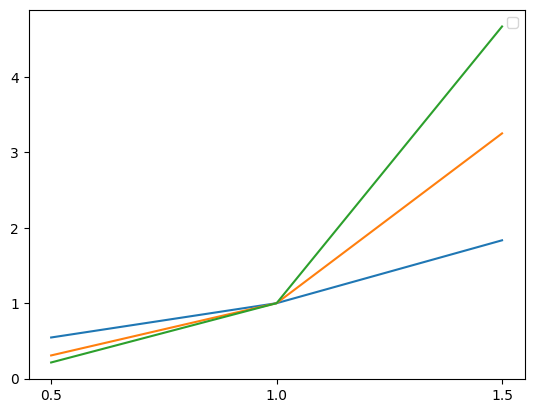

In [78]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt

model = HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

HMratio05 = []
model.par.sigma = 0.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    HMratio05.append(dis_sol.HF/dis_sol.HM) 

HMratio10 = []
model.par.sigma = 1.0
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    HMratio10.append(dis_sol.HF/dis_sol.HM) 

HMratio15 = []
model.par.sigma = 1.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    HMratio15.append(dis_sol.HF/dis_sol.HM) 



fig = plt.figure()
plt.plot(sigma_values, HMratio05)
plt.plot(sigma_values, HMratio10)
plt.plot(sigma_values, HMratio15)
plt.xticks(np.arange(min(sigma_values), max(sigma_values)+0.5, 0.5))
plt.legend()


# Question 2

Explain your code and procedure

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.